In [1]:
import pandas as pd
import numpy as np
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# allows charts to appear in the notebook
%matplotlib inline

# pickle package
import pickle

In [27]:
# import dataset
recipes = pd.read_csv("recipes_muffins_cupcakes.csv")
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


/Users/yikaima/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


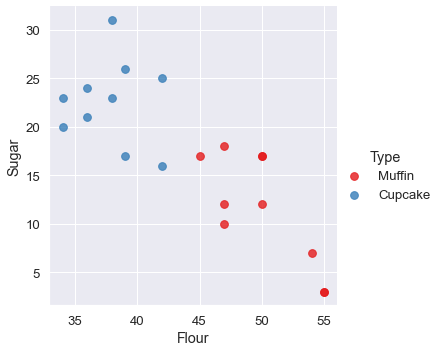

In [28]:
# plot our data
sns.lmplot('Flour','Sugar',data=recipes, hue='Type', 
           palette="Set1",fit_reg = False, scatter_kws={"s":60})
# sns.lmplot: Plot data and regression model fits across a FacetGrid.

In [29]:
# according to the figure above, it seems:
# muffin needs more flour and less sugar
# while cupcake needs more sugar but less flour

In [35]:
# format or preprocessing data
type_label = np.where(recipes["Type"]=="Muffin",0,1)
print(type_label)

recipe_features = recipes.columns.values[1:].tolist()
# df.columns: The column labels of the DataFrame. --> only one row
# same as xxxx.columns[1:].values.tolist()
print(recipe_features)

ingredients = recipes[ ["Flour","Sugar"]].values # we only select two features
print(ingredients)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']
[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [40]:
# fit model
from sklearn.svm import SVC

model=svm.SVC(kernel='linear',random_state=1)
model.fit(ingredients,type_label)

SVC(kernel='linear', random_state=1)

In [64]:
# get the separating hyperplane
w = model.coef_[0]
a = -w[0]/w[1]
# the general equation to a 2D separating line equation: 
# x2 = - w1/w2 * x1 - b/ w2
xx = np.linspace(30,60) 
yy = xx * a - model.intercept_ / w[1]

In [65]:
# plot the parallels to the separating hyperplane taht pass through support vectors
# 
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a *b[0])
b = model.support_vectors_[-1]
yy_up =  a * xx + (b[1] - a*b[0])

/Users/yikaima/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


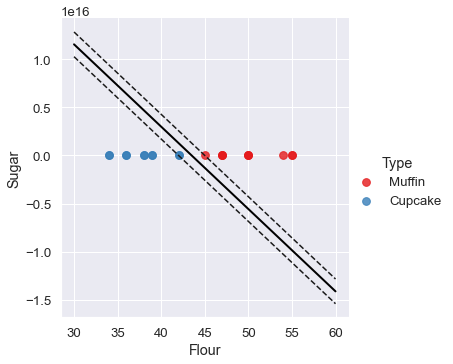

In [66]:
sns.lmplot('Flour','Sugar',data=recipes, hue='Type', 
           palette="Set1",fit_reg = False, scatter_kws={"s":60})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [67]:
# create a function to predict muffin or cupcake
def muffin_or_cupcake(flour,sugar):
    if model.predict([[flour,sugar]]) == 0:
        print('You are looking at a muffin recipe')
    else:
        print("You are looking at a cupcake recipe")

In [69]:
muffin_or_cupcake(10,4)

You are looking at a cupcake recipe


In [74]:
muffin_or_cupcake(65,10)

You are looking at a muffin recipe


/Users/yikaima/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


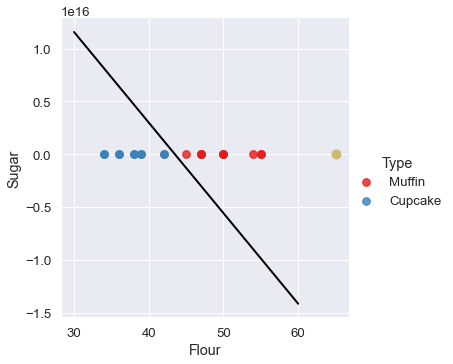

In [76]:
# let's plot this on the graph
sns.lmplot('Flour','Sugar',data=recipes, hue='Type', 
           palette="Set1",fit_reg = False, scatter_kws={"s":60})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(65,10,'yo',markersize = 9)